<a href="https://colab.research.google.com/github/Tony-Jaime02/Banana_Convolution-Neural-Network/blob/main/CNN4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



#Cuarta CNN

Cambios realizados
    
    -->Epocas de traning 10 -> 15
    -->Batch size 8 -> 12 en train_generator
    -->Batch size 6 -> 8 en val_generator

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import seaborn as sns

import tensorflow as tfa
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras.applications import VGG16 
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import optimizers

from sklearn.metrics import multilabel_confusion_matrix, ConfusionMatrixDisplay, confusion_matrix

In [3]:
%cd "/content/drive/MyDrive/Desarrollo de aplicaciones avanzadas de ciencias computacionales/Dataset"

base_dir = 'Fruits'
train_dir = os.path.join(base_dir,'train')
validation_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')

train_datagen = ImageDataGenerator(
							rescale = 1./255,
							rotation_range = 15,
							zoom_range = 0.3,
							horizontal_flip = True,
							brightness_range=[0.7,0.9],
							vertical_flip=True,
							)
							
val_datagen = ImageDataGenerator(1./255)


train_generator = train_datagen.flow_from_directory(
							train_dir,
							target_size = (250, 250),
							batch_size = 12,
							class_mode ='categorical')


val_generator = val_datagen.flow_from_directory(
							validation_dir,
							target_size = (250,250),
							batch_size = 8, #Cada cuantos ejemplos se actualiza la epoca
							#step_per_epoch Cada cuantos batches son una epoca
							class_mode= 'categorical')

conv_base= VGG16(weights='imagenet',
								include_top = False,
								input_shape = (250,250,3))

/content/drive/MyDrive/Desarrollo de aplicaciones avanzadas de ciencias computacionales/Dataset
Found 264 images belonging to 3 classes.
Found 75 images belonging to 3 classes.
58889256/58889256 [==============================] - 0s 0us/step


In [4]:
model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(120,activation='relu'))
#model.add(layers.Dense(40,activation='relu'))
model.add(layers.Dense(3,activation='softmax'))


conv_base.trainable = False

model.summary()

model.compile(loss='categorical_crossentropy',
						optimizer=optimizers.RMSprop(lr=2e-5),
						metrics=['acc'])

history = model.fit(train_generator, 
				steps_per_epoch = 10,
				epochs = 15, 
				validation_data = val_generator, 
				validation_steps = 10)
				


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 25088)             0         
                                                                 
 dense (Dense)               (None, 120)               3010680   
                                                                 
 dense_1 (Dense)             (None, 3)                 363       
                                                                 
Total params: 17,725,731
Trainable params: 3,011,043
Non-trainable params: 14,714,688
_________________________________________________________________


Epoch 1/15
10/10 [==============================] - ETA: 0s - loss: 5.9624 - acc: 0.4167

/usr/local/lib/python3.10/dist-packages/keras/preprocessing/image.py:1861: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn(


10/10 [==============================] - 178s 18s/step - loss: 5.9624 - acc: 0.4167 - val_loss: 42.4658 - val_acc: 0.4000
Epoch 2/15
10/10 [==============================] - 174s 18s/step - loss: 2.6872 - acc: 0.5167 - val_loss: 46.5414 - val_acc: 0.5467
Epoch 3/15
10/10 [==============================] - 175s 18s/step - loss: 1.7545 - acc: 0.5750 - val_loss: 19.3107 - val_acc: 0.6400
Epoch 4/15
10/10 [==============================] - 172s 18s/step - loss: 2.0954 - acc: 0.4917 - val_loss: 12.7370 - val_acc: 0.6533
Epoch 5/15
10/10 [==============================] - 172s 18s/step - loss: 1.8958 - acc: 0.5167 - val_loss: 14.8887 - val_acc: 0.6933
Epoch 6/15
10/10 [==============================] - 177s 19s/step - loss: 1.6647 - acc: 0.5750 - val_loss: 16.6368 - val_acc: 0.6933
Epoch 7/15
10/10 [==============================] - 173s 18s/step - loss: 0.8303 - acc: 0.6583 - val_loss: 18.4480 - val_acc: 0.7333
Epoch 8/15
10/10 [==============================] - 171s 18s/step - loss: 1.0049

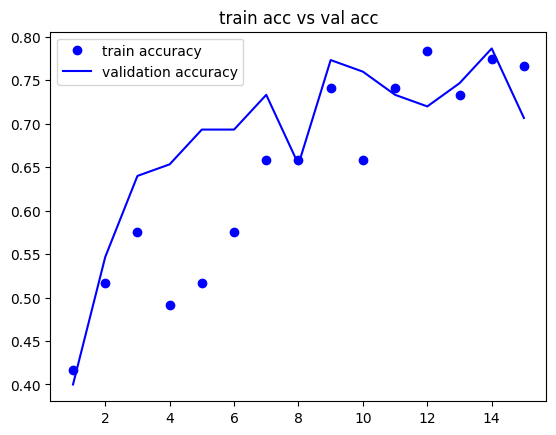

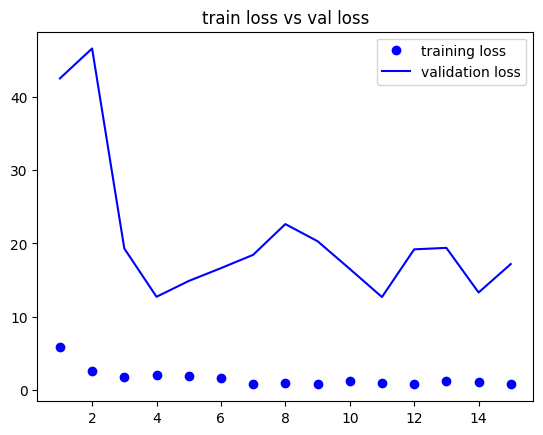

Found 75 images belonging to 3 classes.


<ipython-input-5-5e2fad3251e8>:31: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  test_loss, test_acc = model.evaluate_generator(test_generator, steps = 1)



test acc :
 0.800000011920929


In [5]:
model.save('bananas.h5')
			
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc)+1)

plt.plot(epochs,acc,'bo',label='train accuracy')
plt.plot(epochs,val_acc, 'b', label='validation accuracy')
plt.title('train acc vs val acc')
plt.legend()

plt.figure()

plt.plot(epochs,loss, 'bo', label ='training loss')
plt.plot(epochs,val_loss, 'b', label = 'validation loss')
plt.title('train loss vs val loss')
plt.legend()

plt.show()

test_datagen = ImageDataGenerator(1./255)
test_generator = test_datagen.flow_from_directory(
					test_dir,
					target_size = (250, 250),
					batch_size = 75,
					class_mode= 'categorical')

test_loss, test_acc = model.evaluate_generator(test_generator, steps = 1)
print('\ntest acc :\n', test_acc)

#Matriz de confusión

3/3 [==============================] - 50s 14s/step
[[24  0  2]
 [ 6 21  0]
 [ 4  3 15]]


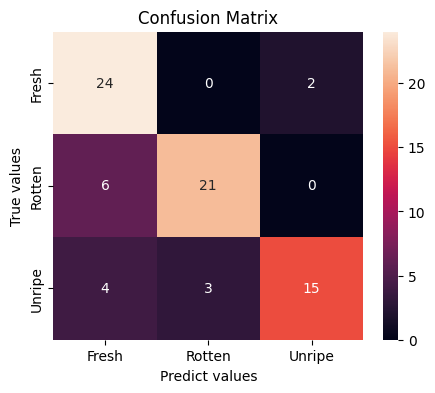

In [6]:
y_test = test_generator[0][0]
y = test_generator[0][1]
y_label = np.argmax(y, axis=1)

#print(y_label)

y_pred = model.predict(y_test)
y_pred_label = np.argmax(y_pred, axis=1)

#print(y_pred)
#print(y_pred_label)

cm = confusion_matrix(y_label, y_pred_label, labels=[0,1,2])
print(cm)

cm_df = pd.DataFrame(cm, index = ['Fresh', 'Rotten', 'Unripe'], columns = ['Fresh', 'Rotten', 'Unripe'])

plt.figure(figsize=(5,4))
sns.heatmap(cm_df, annot=True)
plt.title('Confusion Matrix')
plt.ylabel('True values')
plt.xlabel('Predict values')
plt.show()